In [46]:
import igraph
from igraph import *
import matplotlib.pyplot as plt
import networkx as nx



In [47]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph')

In [48]:
def set_all_B(g):
    for each in g.nodes():
        g.nodes[each]['action'] = 'B'

In [49]:
def set_A(g, list1):
    for each in list1:
        g.nodes[each]['action'] ='A'

In [50]:
def get_colors(g):
    list1=[]
    for each in g.nodes():
        if g.nodes[each]['action']=='B':
            list1.append('red')
        else:
            list1.append('green')
    return list1

In [51]:
G = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph')

In [52]:
set_all_B(g)

In [53]:
list1=[3,7]

In [54]:
set_A(g,list1)

In [55]:
colors= get_colors(g)

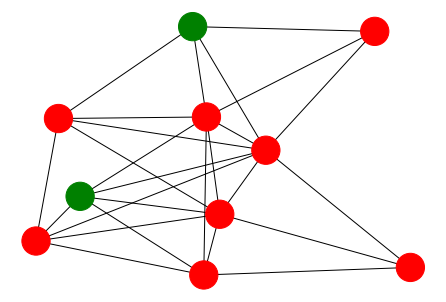

In [59]:
nx.draw(g, node_color = colors, node_size=800)
plt.show()